In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Generating the random dataset

In [27]:
a = 0
b = 1
x = np.random.uniform(a,b,50)
x = x.reshape(50,1)
x.shape

(50, 1)

In [28]:
mean = 0
sigma = 0.03
noise = np.random.normal(mean,sigma,50)
noise = noise.reshape(50,1)

In [29]:
y = np.sin(1+np.square(x))
y_noise = np.sin(1+np.square(x)) + noise
y = y.reshape(50)
y_noise = y_noise.reshape(50)

### Splitting the train and test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(x,y_noise,test_size=0.2,random_state=42)

### Plot without noise

Text(0, 0.5, 'y')

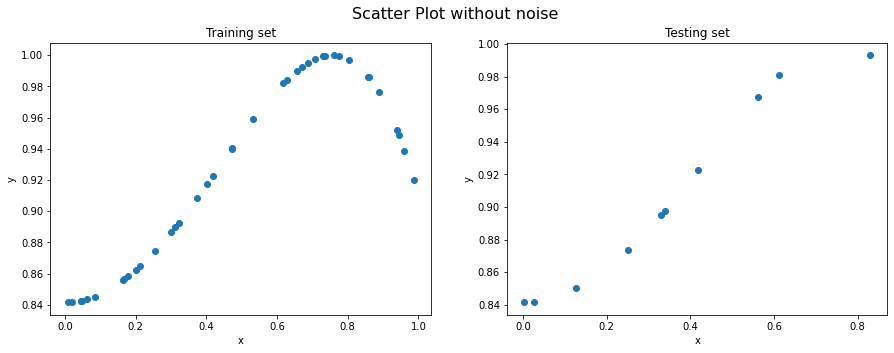

In [31]:
# Scatter plot without noise

f = plt.figure(figsize=(15,5))
f.suptitle('Scatter Plot without noise', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train, y_train)
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = f.add_subplot(122)
ax2.scatter(X_test, y_test)
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

### Plot with noise

Text(0, 0.5, 'y')

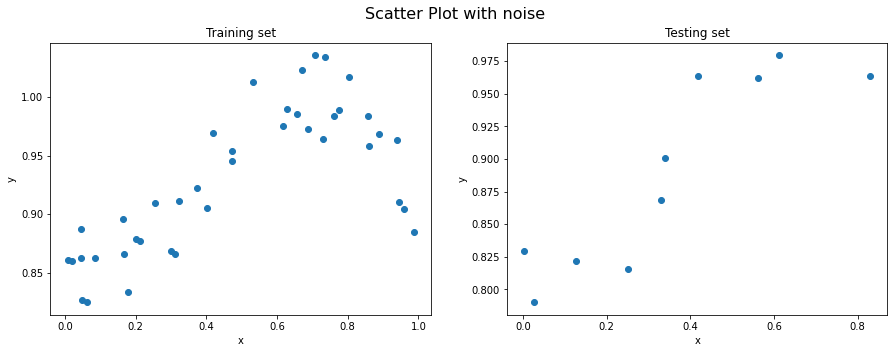

In [32]:
# Scatter plot with noise

f = plt.figure(figsize=(15,5))
f.suptitle('Scatter Plot with noise', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train_noise, y_train_noise)
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = f.add_subplot(122)
ax2.scatter(X_test_noise, y_test_noise)
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

### Trainning the data

In [33]:
class PolynomailRegression() :
     
    def __init__(self,deg,lr,itr) :
         
        self.deg = deg
        self.lr = lr
        self.itr = itr
        
    def add_degree(self,X) :
        
        X_transform = np.ones((X.shape[0],1))
        j = 0
        
        for j in range( self.deg + 1 ) :
            if j != 0 :
                x_pow = np.power(X,j)
                X_transform = np.append(X_transform,x_pow.reshape(-1,1),axis = 1)
 
        return X_transform  

    def normalize(self,X):
         
        X[:,1:] = (X[:,1:]-np.mean( X[:,1:],axis=0))/np.std(X[:,1:],axis=0)
        
        return X

    def fit(self,X,Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        self.W = np.zeros( self.deg + 1 )
        
        X_transform = self.add_degree( self.X )
        X_normalize = self.normalize( X_transform )
        
        for i in range( self.itr ) :
            
            h = self.predict( self.X )
            err = h - self.Y
            self.W = self.W-self.lr*(1/self.m)*np.dot(X_normalize.T,err)
         
        return self

    def predict( self, X ) :
        X_transform = self.add_degree( X )
        X_normalize = self.normalize( X_transform )
         
        return np.dot( X_transform, self.W )

In [34]:
def loss(y, y_pred):
    loss = np.mean((y_pred - y)**2)
    return loss

## Data Analysis without Noise

### Linear Regression

In [35]:
model = PolynomailRegression(deg = 1,lr=0.1,itr=1000)
model.fit( X_train, y_train )

In [36]:
LR_Y_train_pred = model.predict(X_train)
LR_Y_test_pred = model.predict(X_test)

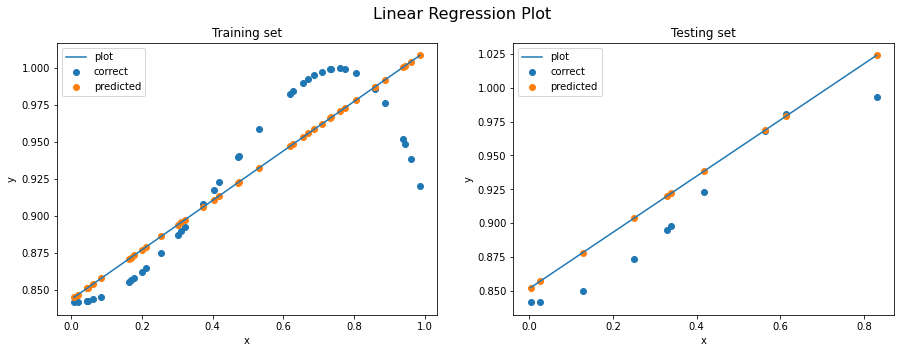

In [37]:
# Plotting Linear Regression

f = plt.figure(figsize=(15,5))
f.suptitle('Linear Regression Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train, y_train, label="correct")
ax1.scatter(X_train, LR_Y_train_pred, label="predicted")
X_plot = np.sort(X_train,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test, y_test, label="correct")
ax2.scatter(X_test, LR_Y_test_pred, label="predicted")
X_plot = np.sort(X_test,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [38]:
# RMSE Error
error = loss(y_test, LR_Y_test_pred)
print('RMSE Error of Linear Regression = ', error)

RMSE Error of Linear Regression =  0.00044859103354541235


### Polynomial Regression

#### Of Degree 2

In [39]:
model = PolynomailRegression(deg = 2,lr=0.1,itr=1000)
model.fit( X_train, y_train )

In [40]:
PR2_Y_train_pred = model.predict(X_train)
PR2_Y_test_pred = model.predict(X_test)

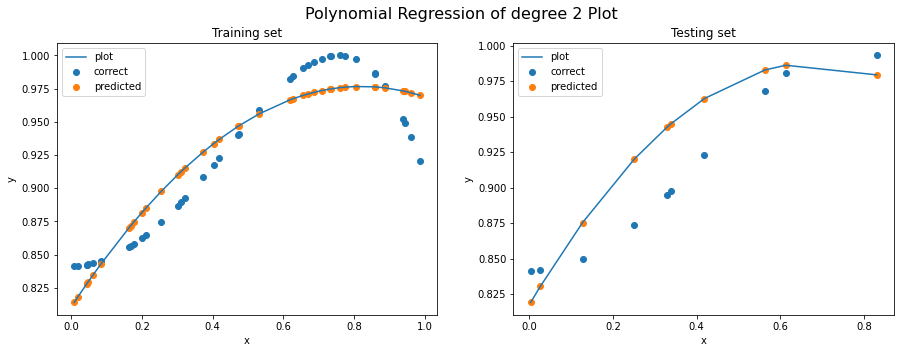

In [41]:
# Plotting Polynomial Regression of degree 2

f = plt.figure(figsize=(15,5))
f.suptitle('Polynomial Regression of degree 2 Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train, y_train, label="correct")
ax1.scatter(X_train, PR2_Y_train_pred, label="predicted")
X_plot = np.sort(X_train,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test, y_test, label="correct")
ax2.scatter(X_test, PR2_Y_test_pred, label="predicted")
X_plot = np.sort(X_test,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [42]:
# RMSE Error
error = loss(y_test, PR2_Y_test_pred)
print('RMSE Error of Polynomial Regression of degree 2 = ', error)

RMSE Error of Polynomial Regression of degree 2 =  0.0009955866229555935


#### Of Degree 3

In [43]:
model = PolynomailRegression(deg = 3,lr=0.1,itr=1000)
model.fit( X_train, y_train )

In [44]:
PR3_Y_train_pred = model.predict(X_train)
PR3_Y_test_pred = model.predict(X_test)

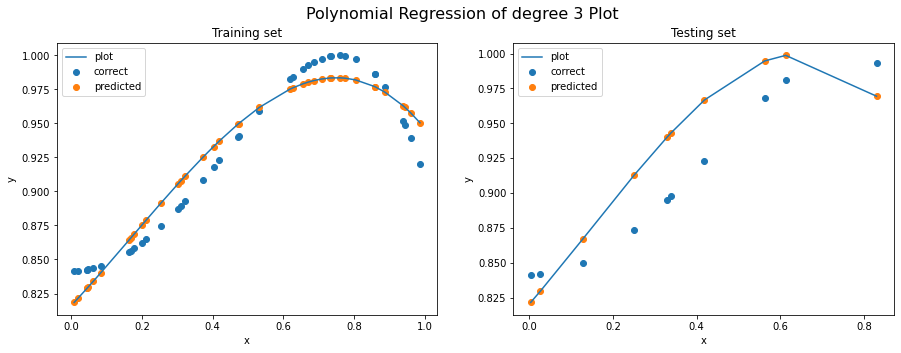

In [45]:
# Plotting Polynomial Regression of degree 3

f = plt.figure(figsize=(15,5))
f.suptitle('Polynomial Regression of degree 3 Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train, y_train, label="correct")
ax1.scatter(X_train, PR3_Y_train_pred, label="predicted")
X_plot = np.sort(X_train,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test, y_test, label="correct")
ax2.scatter(X_test, PR3_Y_test_pred, label="predicted")
X_plot = np.sort(X_test,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [46]:
# RMSE Error
error = loss(y_test, PR3_Y_test_pred)
print('RMSE Error of Polynomial Regression of degree 3 = ', error)

RMSE Error of Polynomial Regression of degree 3 =  0.0010007861335496822


#### Of Degree 4

In [69]:
model = PolynomailRegression(deg = 4,lr=0.1,itr=1000)
model.fit( X_train, y_train )

In [70]:
PR4_Y_train_pred = model.predict(X_train)
PR4_Y_test_pred = model.predict(X_test)

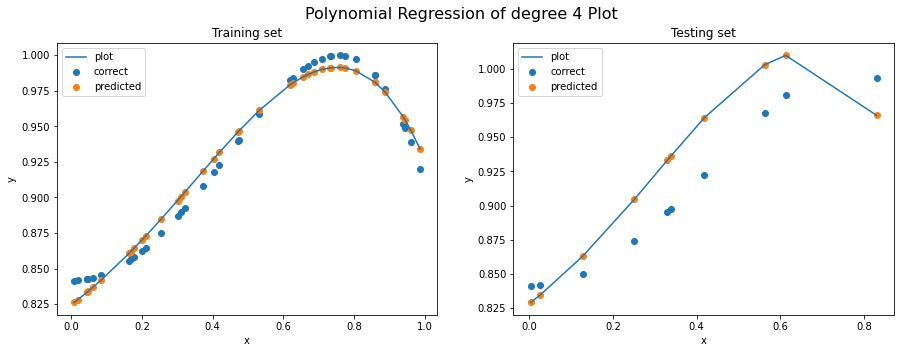

In [71]:
# Plotting Polynomial Regression of degree 4

f = plt.figure(figsize=(15,5))
f.suptitle('Polynomial Regression of degree 4 Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train, y_train, label="correct")
ax1.scatter(X_train, PR4_Y_train_pred, label="predicted")
X_plot = np.sort(X_train,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test, y_test, label="correct")
ax2.scatter(X_test, PR4_Y_test_pred, label="predicted")
X_plot = np.sort(X_test,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [72]:
# RMSE Error
error = loss(y_test, PR4_Y_test_pred)
print('RMSE Error of Polynomial Regression of degree 4 = ', error)

RMSE Error of Polynomial Regression of degree 4 =  0.0008795856445626508


## Data Analysis with noise

### Linear Regression

In [51]:
model = PolynomailRegression(deg = 1,lr=0.1,itr=1000)
model.fit( X_train_noise, y_train_noise )

In [52]:
LR_Y_train_pred = model.predict(X_train_noise)
LR_Y_test_pred = model.predict(X_test_noise)

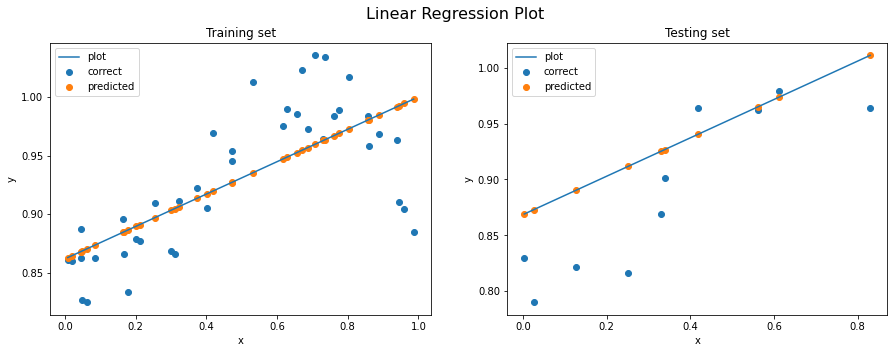

In [53]:
# Plotting Linear Regression

f = plt.figure(figsize=(15,5))
f.suptitle('Linear Regression Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train_noise, y_train_noise, label="correct")
ax1.scatter(X_train_noise, LR_Y_train_pred, label="predicted")
X_plot = np.sort(X_train_noise,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test_noise, y_test_noise, label="correct")
ax2.scatter(X_test_noise, LR_Y_test_pred, label="predicted")
X_plot = np.sort(X_test_noise,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [55]:
# RMSE Error
error = loss(y_test_noise, LR_Y_test_pred)
print('RMSE Error of Linear Regression = ', error)

RMSE Error of Linear Regression =  0.0029045819953221904


### Polynomial Regression

#### Of Degree 2

In [56]:
model = PolynomailRegression(deg = 2,lr=0.1,itr=1000)
model.fit( X_train_noise, y_train_noise )

In [57]:
PR2_Y_train_pred = model.predict(X_train_noise)
PR2_Y_test_pred = model.predict(X_test_noise)

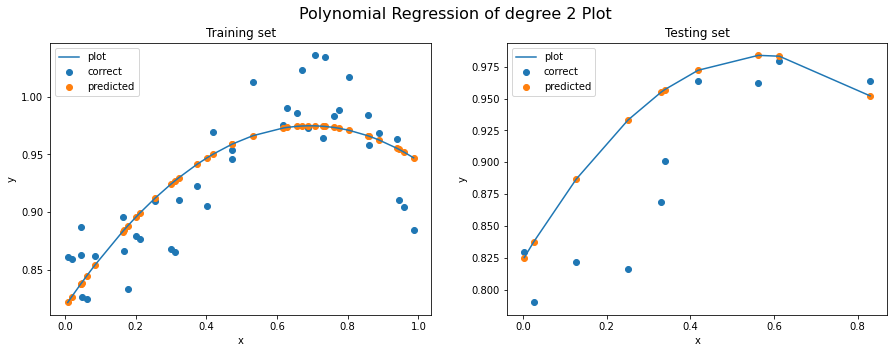

In [59]:
# Plotting Polynomial Regression of degree 2

f = plt.figure(figsize=(15,5))
f.suptitle('Polynomial Regression of degree 2 Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train_noise, y_train_noise, label="correct")
ax1.scatter(X_train_noise, PR2_Y_train_pred, label="predicted")
X_plot = np.sort(X_train_noise,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test_noise, y_test_noise, label="correct")
ax2.scatter(X_test_noise, PR2_Y_test_pred, label="predicted")
X_plot = np.sort(X_test,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [60]:
# RMSE Error
error = loss(y_test_noise, PR3_Y_test_pred)
print('RMSE Error of Polynomial Regression of degree 3 = ', error)

RMSE Error of Polynomial Regression of degree 3 =  0.0021512627095963753


#### Of Degree 3

In [83]:
model = PolynomailRegression(deg = 3,lr=0.1,itr=1000)
model.fit( X_train_noise, y_train_noise )

In [84]:
PR3_Y_train_pred = model.predict(X_train_noise)
PR3_Y_test_pred = model.predict(X_test_noise)

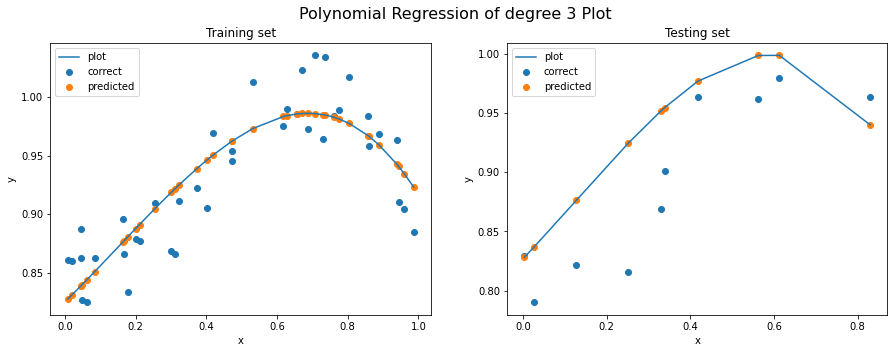

In [85]:
# Plotting Polynomial Regression of degree 3

f = plt.figure(figsize=(15,5))
f.suptitle('Polynomial Regression of degree 3 Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train_noise, y_train_noise, label="correct")
ax1.scatter(X_train_noise, PR3_Y_train_pred, label="predicted")
X_plot = np.sort(X_train_noise,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test_noise, y_test_noise, label="correct")
ax2.scatter(X_test_noise, PR3_Y_test_pred, label="predicted")
X_plot = np.sort(X_test_noise,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [86]:
# RMSE Error
error = loss(y_test_noise, PR3_Y_test_pred)
print('RMSE Error of Polynomial Regression of degree 3 = ', error)

RMSE Error of Polynomial Regression of degree 3 =  0.0029135574002133943


#### Of Degree 4

In [78]:
model = PolynomailRegression(deg = 4,lr=0.1,itr=1000)
model.fit( X_train_noise, y_train_noise )

In [79]:
PR4_Y_train_pred = model.predict(X_train_noise)
PR4_Y_test_pred = model.predict(X_test_noise)

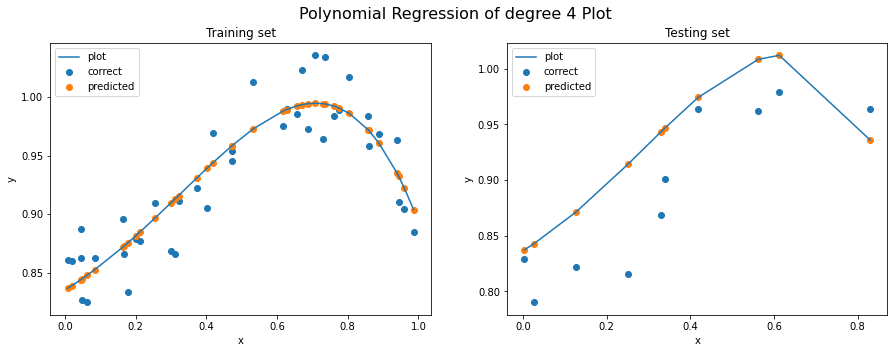

In [80]:
# Plotting Polynomial Regression of degree 4

f = plt.figure(figsize=(15,5))
f.suptitle('Polynomial Regression of degree 4 Plot', fontsize=16)

ax1 = f.add_subplot(121)
ax1.scatter(X_train_noise, y_train_noise, label="correct")
ax1.scatter(X_train_noise, PR4_Y_train_pred, label="predicted")
X_plot = np.sort(X_train_noise,0)
Y_plot = model.predict(X_plot)
ax1.plot(X_plot,Y_plot,label='plot')
ax1.set_title('Training set')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")

ax2 = f.add_subplot(122)
ax2.scatter(X_test_noise, y_test_noise, label="correct")
ax2.scatter(X_test_noise, PR4_Y_test_pred, label="predicted")
X_plot = np.sort(X_test_noise,0)
Y_plot = model.predict(X_plot)
ax2.plot(X_plot,Y_plot,label='plot')
ax2.set_title('Testing set')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend(loc="upper left")

In [81]:
# RMSE Error
error = loss(y_test_noise, PR4_Y_test_pred)
print('RMSE Error of Polynomial Regression of degree 4 = ', error)

RMSE Error of Polynomial Regression of degree 4 =  0.002672388207333968
